<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
receives information from the dataset, the only such part of the model
### Hidden Layer:
functions inside of the model that transform input data into output data
### Output Layer:
returns vector of values from input layer after transformation by the hidden layer
### Neuron:
nodes that receive inputs and transform that into an output
### Weight:
percentage out of 100% assigned to each type of input
### Activation Function:
included in every node, decides how much received signal to pass on to the next layer
### Node Map: 
visual diagram of the architecture of a neural network
### Perceptron:
simplest type of neural network: a single node/neuron that multiplies each input by a weight and sums them

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [39]:
import numpy as np

inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

correct_outputs = [[1], [1], [1], [0]]

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [41]:
# initialize random weights
weights = np.random.random((2, 1))
weights

array([[0.25503812],
       [0.60394854]])

In [42]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.        ],
       [0.25503812],
       [0.60394854],
       [0.85898665]])

In [43]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.5       ],
       [0.56341616],
       [0.64655915],
       [0.70244889]])

In [44]:
error = correct_outputs - activated_output
error

array([[ 0.5       ],
       [ 0.43658384],
       [ 0.35344085],
       [-0.70244889]])

In [45]:
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.11750186],
       [ 0.10092267],
       [ 0.07973298],
       [-0.15561352]])

In [46]:
weights += np.dot(inputs.T, adjustments)
weights

array([[0.20034727],
       [0.528068  ]])

In [47]:
# not sure why all outputs are 0.5 - sigmoid function wrong to use?

for iteration in range(1000):
    weighted_sum = np.dot(inputs, weights)
    
    activated_output = sigmoid(weighted_sum)
    
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    weights += np.dot(inputs.T, adjustments)
    
print('weights after train:')
print(weights)

print('output after training:')
print(activated_output)

weights after train:
[[-3.05311332e-16]
 [ 1.52655666e-16]]
output after training:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


In [ ]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

dataset = [[0,0,1],
          [1,0,1],
          [0,1,1],
          [1,1,0]]

weights = [-0.1, np.random.random, np.random.random]

for row in dataset:
    prediction = predict()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [49]:
import pandas as pd

pima = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')

In [50]:
print(pima.shape)
pima.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [228]:
class Perceptron(object):
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        self.weight = np.zeros(1 + X.shape[1])
        self.errors = []
        
        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [230]:
X = pima.iloc[:, [3, 7]].values
y = pima['Outcome'].values

In [231]:
pn = Perceptron(0.1, 10)

In [232]:
pn.fit(X, y)

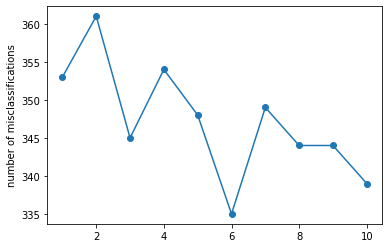

In [233]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.ylabel('number of misclassifications')
plt.show();

In [234]:
pima['Predictions'] = pn.predict(X)

In [235]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predictions,Correct?
0,6,148,72,35,0,33.6,0.627,50,1,0,False
1,1,85,66,29,0,26.6,0.351,31,0,0,True
2,8,183,64,0,0,23.3,0.672,32,1,1,False
3,1,89,66,23,94,28.1,0.167,21,0,0,True
4,0,137,40,35,168,43.1,2.288,33,1,0,False


In [238]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predictions
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.298177
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.457756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [237]:
pima['Outcome'] = pima['Outcome'].astype(int)
pima['Predictions'] = pima['Predictions'].astype(int)

pima['Correct?'] = (pima['Outcome'] == pima['Predictions'])

In [239]:
# 58.4% accuracy

pima['Correct?'].describe()

count      768
unique       2
top       True
freq       449
Name: Correct?, dtype: object

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?